<a href="https://colab.research.google.com/github/deekshitha411/bits_5d5/blob/main/Finalized__RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models,layers,regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import numpy as np, pandas as pd
np.__version__, pd.__version__

('1.26.4', '2.3.3')

In [ ]:
#data ingestion
# data_path = '/sentiment_data_1000.csv'

df = pd.read_csv('sentiment_data_1000.csv')

In [ ]:
#Tour of Our Data
df.head(3)

,text,label
0,"What a bad experience, I won’t come again.",0
1,The support team was rude and unhelpful.,0
2,What a wonderful day!,1


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
#class check  as we have two class
df['label'].value_counts().plot(kind='bar')

In [ ]:
#dependent and Independent variable
X = df['text']
y = df['label']
X

,text
0,"What a bad experience, I won’t come again."
1,The support team was rude and unhelpful.
2,What a wonderful day!
3,I regret buying this item.
4,Such a beautiful and inspiring story.
...,...
995,This is the worst service I have ever seen.
996,This made me so angry and frustrated.
997,Such a beautiful and inspiring story.
998,The support team was rude and unhelpful.


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#tokenization
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
len(tokenizer.word_index.keys())

81

In [ ]:
#making sequence
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq[0], X_test_seq[1], X_train_seq[2], X_test_seq[3]

([3, 14, 15, 33, 2, 34, 35],
 [4, 19, 6, 68, 2, 69],
 [3, 14, 15, 33, 2, 34, 35],
 [4, 19, 6, 68, 2, 69])

In [ ]:
max_length = 0
for i in X_train_seq:
  if len(i)>max_length:
    max_length = len(i)
print(max_length)

9


In [ ]:
max = 0
for i in X_train_seq:
  if len(i)>max:
    max = len(i)
print(max)


In [ ]:
#add padding
X_train_padded = pad_sequences(X_train_seq,padding='post',maxlen=20)
X_test_padded = pad_sequences(X_test_seq,padding='post',maxlen=20)
print(X_train_padded)

[[ 3 14 15 ...  0  0  0]
 [ 5 24 25 ...  0  0  0]
 [ 3 14 15 ...  0  0  0]
 ...
 [20 21  4 ...  0  0  0]
 [ 5 18 58 ...  0  0  0]
 [20 21  4 ...  0  0  0]]


In [ ]:
X_train_padded.max()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_pad_sm, y_train_sm = sm.fit_resample(X_train_padded, y_train)

In [ ]:
y_train_sm.value_counts()

## Now we will design two models


In [ ]:
model1 = models.Sequential([
    #embedding layer
    layers.Embedding(input_dim=100,output_dim=32,input_length=20),
    #RNN layer(hidden layer)
    layers.SimpleRNN(units=32,activation='tanh'),
    #output layer
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model1.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
X_train_padded.shape

(800, 20)

In [ ]:
history1 = model1.fit(X_train_padded, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7979 - loss: 0.5234


In [ ]:
loss, acc = model1.evaluate(X_test_padded, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")


✅ Test Accuracy: 100.00%


29      This product is great and works perfectly.
535                     I regret buying this item.
695     This product is great and works perfectly.
557           I love this movie, it was fantastic!
836    This is the worst service I have ever seen.
                          ...                     
106                     I regret buying this item.
270                     I regret buying this item.
860        Absolutely loved the taste of the food!
435                I am very disappointed and sad.
102        Absolutely loved the taste of the food!
Name: text, Length: 800, dtype: object

In [ ]:
sample_text = ['Warangal is good place']
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=20, padding='post')
predictions = model1.predict(sample_pad)
print(predictions)
for t, p in zip(sample_text, predictions):
    print(f"Text: {t} → Sentiment: {'Positive 😊' if p > 0.5 else 'Negative 😠'} {p}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[[0.07283348]]
Text: Warangal is good place → Sentiment: Negative 😠 [0.07283348]


In [ ]:
model2 = models.Sequential([
    layers.Embedding(input_dim=100,output_dim=64,input_length=20),
    layers.SpatialDropout1D(0.3),
    layers.SimpleRNN(
        units=64,
        activation='tanh',
        kernel_regularizer=regularizers.l2(0.001),
        dropout=0.3,
        recurrent_dropout=0.3
    ),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history2 = model2.fit(
    X_train_pad_sm, y_train_sm,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
26/26 [==============================] - 2s 7ms/step - loss: 0.8313 - accuracy: 0.5036
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 0.8159 - accuracy: 0.5365
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 0.8114 - accuracy: 0.5207
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.8097 - accuracy: 0.5426
Epoch 5/20
26/26 [==============================] - 0s 6ms/step - loss: 0.8158 - accuracy: 0.5109
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.7841 - accuracy: 0.5499
Epoch 7/20
26/26 [==============================] - 0s 6ms/step - loss: 0.7801 - accuracy: 0.5633
Epoch 8/20
26/26 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.6910
Epoch 9/20
26/26 [==============================] - 0s 6ms/step - loss: 0.4005 - accuracy: 0.9124
Epoch 10/20
26/26 [==============================] - 0s 6ms/step - loss: 0.2624 - accuracy: 0.9550
Epoch 11/20
26/26 [

KeyError: 'val_loss'

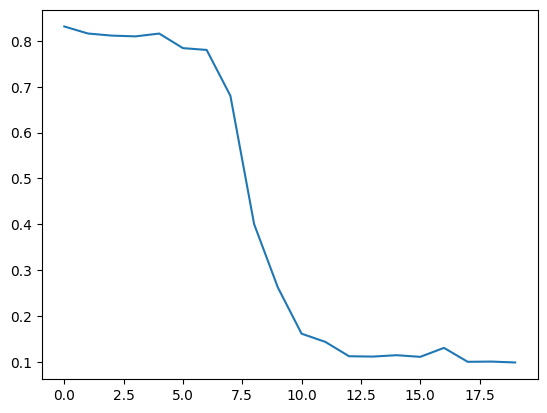

In [ ]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')

In [ ]:
def get_prediction(sample_text,model):
  sample_seq = tokenizer.texts_to_sequences(sample_text)
  sample_pad = pad_sequences(sample_seq, maxlen=20, padding='post')
  predictions = model.predict(sample_pad)
  print(predictions)
  for t, p in zip(sample_text, predictions):
    print(f"Text: {t} → Sentiment: {'Positive 😊' if p > 0.5 else 'Negative 😠'} {p}")

In [ ]:
get_prediction(sample_text=['I went to movie and found This movie regret'],model=model1)

1/1 [==============================] - 0s 31ms/step
[[0.8819533]]
Text: I went to movie and found This movie regret → Sentiment: Positive 😊 [0.8819533]


In [ ]:
y_train.value_counts()

label
1    411
0    389
Name: count, dtype: int64

In [ ]:
# !pip install imblearn